## Pakistan Population Analysis
# *** Author Name *** : Shafiq Ahmed 
# ***Email*** : shafiq_ahmed73@hotmail.com 
###  Date : 2024-10-11


# The data was collected from the following link [link] (https://www.kaggle.com/datasets/mabdullahsajid/population-of-pakistan-dataset) :


# Year of data 
1. 2017
2. 1998

# The dataset collection from the sourse have following discription:
# Discription:
### Description
This dataset contains demographic information from the Pakistan Population Census conducted in 2017. It provides detailed population data at various administrative levels within Pakistan, including provinces, divisions, districts, and sub-divisions. The dataset also includes information on urban and rural populations, gender distribution, transgender individuals, sex ratios, population figures from the 1998 census, and annual growth rates.

Features
Province: The administrative provinces or regions of Pakistan where the census data was collected.

Division: The divisions within each province. Divisions are the second level of administrative divisions in Pakistan.

District: Districts within each division, representing larger administrative units.

Sub-Division: Sub-divisions or tehsils within each district, providing more localized data.

Area: The land area (in square kilometers) of each sub-division.

Urban Population 2017: The population of urban areas within each sub-division for the year 2017.

## Purpose of this analysis
we will fill this at the end or during the process

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# import the data set
df = pd.read_csv('Life Expectancy Data.csv')

In [5]:
# Quick overview
print(df.head())
print(df.info())

# Drop missing data (you can also impute instead)
df.dropna(inplace=True)


       Country    Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015.0  Developing              65.0            263.0   
1  Afghanistan  2014.0  Developing              59.9            271.0   
2  Afghanistan  2013.0  Developing              59.9            268.0   
3  Afghanistan  2012.0  Developing              59.5            272.0   
4  Afghanistan  2011.0  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0           62.0     0.01               71.279624         65.0    1154.0  ...   
1           64.0     0.01               73.523582         62.0     492.0  ...   
2           66.0     0.01               73.219243         64.0     430.0  ...   
3           69.0     0.01               78.184215         67.0    2787.0  ...   
4           71.0     0.01                7.097109         68.0    3013.0  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0    6.0           

In [10]:
import os

# Create 'images' directory if it doesn't exist
os.makedirs("images", exist_ok=True)

plt.savefig("images/top10_life_expectancy.png")
plt.show()

<Figure size 640x480 with 0 Axes>

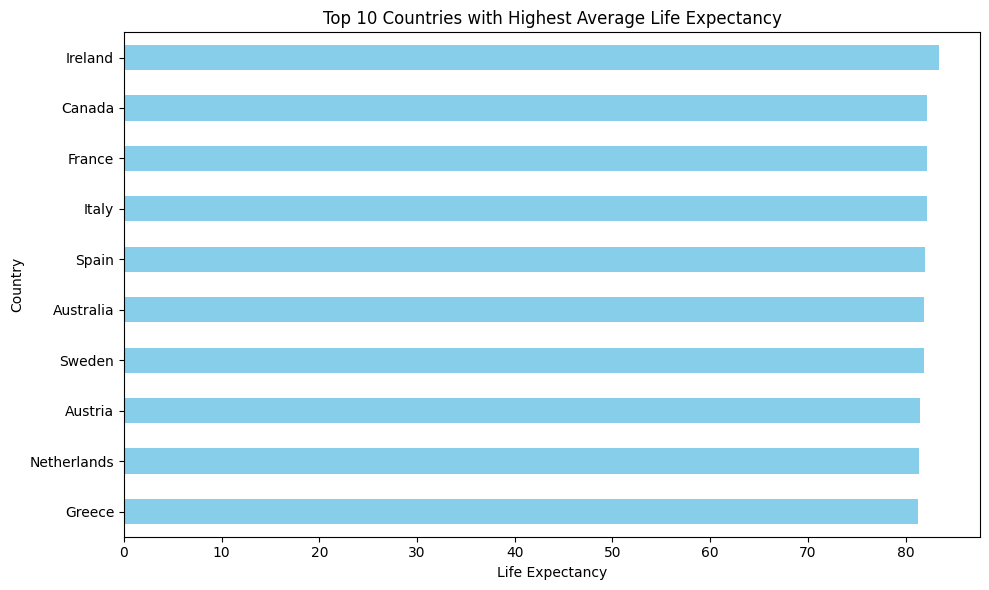

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_life = df.groupby('Country')['Life expectancy '].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_life.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Countries with Highest Average Life Expectancy")
plt.xlabel("Life Expectancy")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("images/top10_life_expectancy.png")
plt.show()


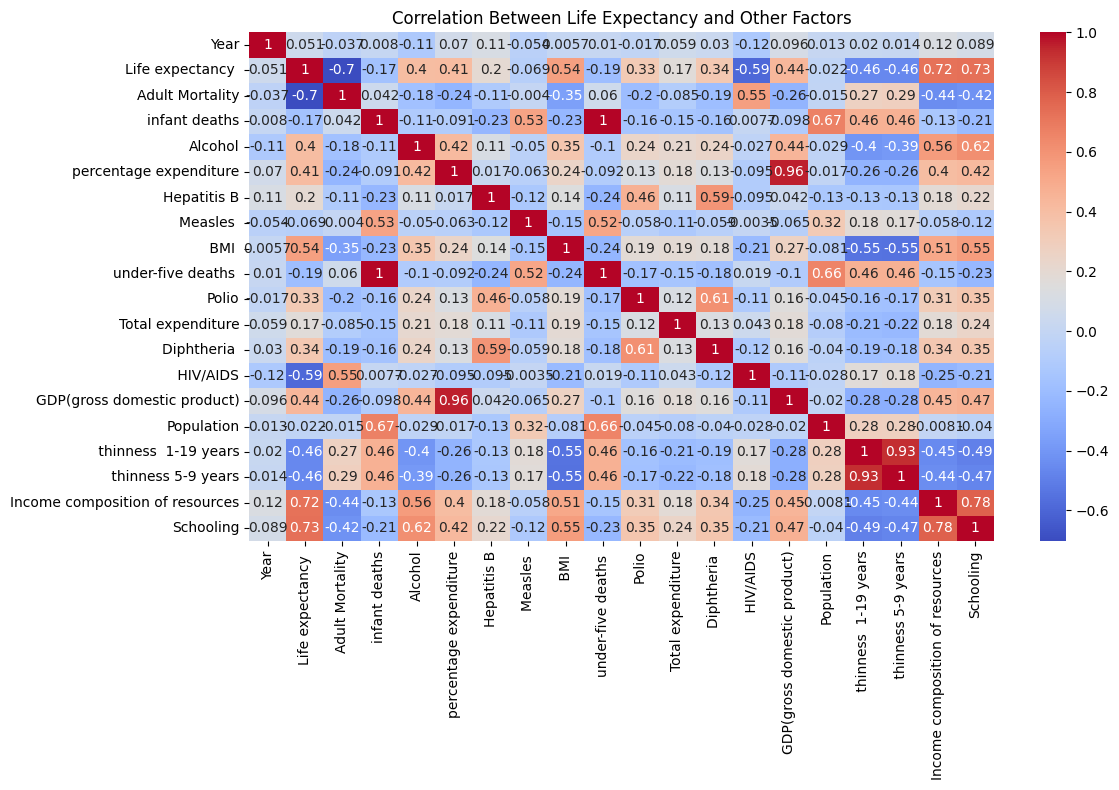

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Life Expectancy and Other Factors")
plt.tight_layout()
plt.savefig("images/correlation_heatmap.png")
plt.show()

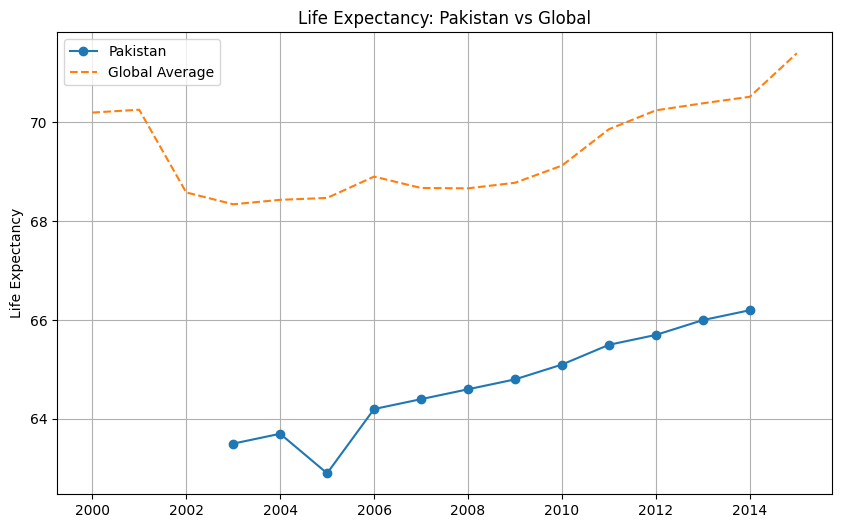

In [13]:
pakistan = df[df['Country'] == 'Pakistan']
global_avg = df.groupby('Year')['Life expectancy '].mean()

plt.figure(figsize=(10,6))
plt.plot(pakistan['Year'], pakistan['Life expectancy '], label='Pakistan', marker='o')
plt.plot(global_avg.index, global_avg.values, label='Global Average', linestyle='--')
plt.title('Life Expectancy: Pakistan vs Global')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.savefig("images/pakistan_vs_global.png")
plt.show()


In [16]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP(gross domestic product)', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Select features
features = ['GDP(gross domestic product)', 'Schooling', ' BMI ', 'Alcohol', 'Adult Mortality']
target = 'Life expectancy '

# Clean data
model_df = df[features + [target]].dropna()

X = model_df[features]
y = model_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R2 Score: 0.7191287612686021
RMSE: 4.466337783241345


In [26]:
# Example: What affects life expectancy most?
# df.corr()['Life expectancy '].sort_values(ascending=False)

# Example: Show average life by country
df.groupby('Country')['Life expectancy '].mean().sort_values(ascending=False)


Country
Ireland         83.440000
Canada          82.233333
France          82.206667
Italy           82.153333
Spain           82.020000
                  ...    
Angola          50.675000
Malawi          50.261538
Zimbabwe        49.386667
Lesotho         48.608333
Sierra Leone    48.425000
Name: Life expectancy , Length: 133, dtype: float64

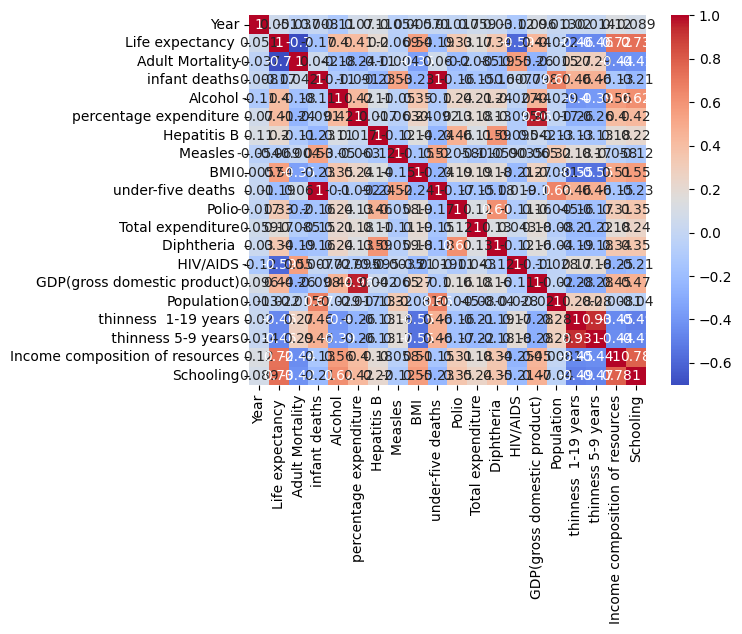

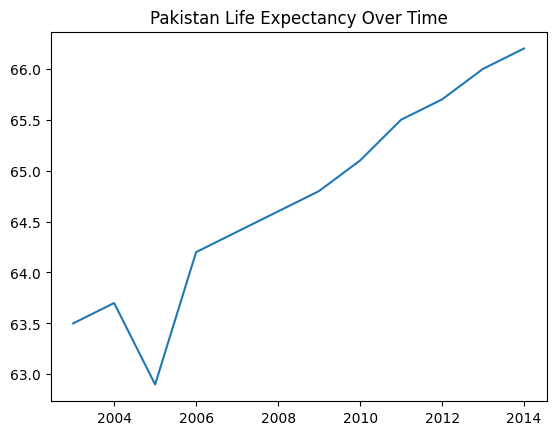

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# Line plot over time
pak = df[df['Country'] == 'Pakistan']
plt.plot(pak['Year'], pak['Life expectancy '])
plt.title('Pakistan Life Expectancy Over Time')
plt.show()


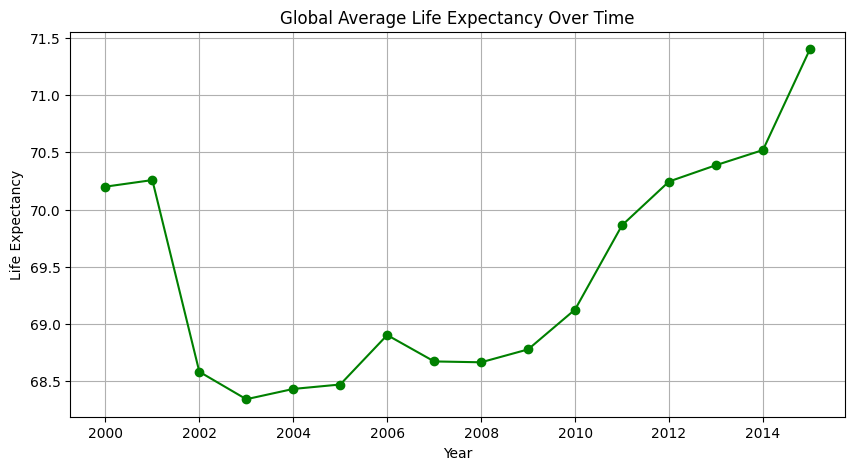

In [29]:

# Group by Year and calculate global average
yearly_avg = df.groupby('Year')['Life expectancy '].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', color='green')
plt.title('Global Average Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()


In [30]:

# Filter for the year 2015
df_2015 = df[df['Year'] == 2015]

# Group by Country and get average life expectancy (in case there are duplicates)
country_life = df_2015.groupby('Country')['Life expectancy '].mean()

# Top 5 countries
top_5 = country_life.sort_values(ascending=False).head(5)

# Bottom 5 countries
bottom_5 = country_life.sort_values().head(5)

print("🌍 Top 5 Countries with Highest Life Expectancy in 2015:")
print(top_5)
print("\n⚠️ Bottom 5 Countries with Lowest Life Expectancy in 2015:")
print(bottom_5)


🌍 Top 5 Countries with Highest Life Expectancy in 2015:
Country
Albania        77.8
Afghanistan    65.0
Name: Life expectancy , dtype: float64

⚠️ Bottom 5 Countries with Lowest Life Expectancy in 2015:
Country
Afghanistan    65.0
Albania        77.8
Name: Life expectancy , dtype: float64


In [23]:
# print(df[features].dtypes)
print(df[features].head())

   GDP(gross domestic product)  Schooling   BMI   Alcohol  Adult Mortality
0                   584.259210       10.1   19.1     0.01            263.0
1                   612.696514       10.0   18.6     0.01            271.0
2                   631.744976        9.9   18.1     0.01            268.0
3                   669.959000        9.8   17.6     0.01            272.0
4                    63.537231        9.5   17.2     0.01            275.0


In [24]:
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [15]:
# To find the indices of missing values in a specific column, for example 'Life expectancy':
missing_indices = df[df['Life expectancy '].isnull()].index.tolist()
missing_indices

[624, 769, 1650, 1715, 1812, 1909, 1958, 2167, 2216, 2713, 2938, 2939]

In [17]:
# To find the indices of missing values in a specific column, for example 'Life expectancy':
missing_indices = df[df['Alcohol'].isnull()].index.tolist()
missing_indices

[32,
 48,
 64,
 80,
 96,
 112,
 128,
 144,
 160,
 176,
 192,
 208,
 224,
 240,
 256,
 272,
 288,
 304,
 320,
 336,
 352,
 368,
 384,
 400,
 416,
 432,
 448,
 464,
 480,
 496,
 512,
 528,
 544,
 560,
 576,
 592,
 608,
 625,
 641,
 657,
 673,
 689,
 705,
 721,
 737,
 753,
 770,
 786,
 802,
 818,
 834,
 850,
 866,
 882,
 898,
 914,
 930,
 946,
 962,
 978,
 994,
 1010,
 1026,
 1042,
 1058,
 1074,
 1090,
 1106,
 1122,
 1138,
 1154,
 1170,
 1186,
 1202,
 1218,
 1234,
 1250,
 1266,
 1282,
 1298,
 1314,
 1330,
 1346,
 1362,
 1378,
 1394,
 1410,
 1426,
 1442,
 1458,
 1474,
 1490,
 1506,
 1522,
 1538,
 1554,
 1570,
 1586,
 1602,
 1618,
 1634,
 1651,
 1667,
 1683,
 1699,
 1716,
 1732,
 1742,
 1748,
 1764,
 1780,
 1796,
 1813,
 1829,
 1861,
 1877,
 1893,
 1926,
 1942,
 1958,
 1959,
 1975,
 1991,
 2007,
 2023,
 2039,
 2055,
 2071,
 2087,
 2103,
 2119,
 2135,
 2151,
 2168,
 2184,
 2200,
 2217,
 2233,
 2249,
 2265,
 2281,
 2297,
 2329,
 2345,
 2361,
 2377,
 2393,
 2409,
 2410,
 2411,
 2412,
 2413,
 2

In [18]:
df[df['Life expectancy '].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP(gross domestic product),Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013.0,Developing,NaN,NaN,0.0,0.01,0.000000,98.0,0.0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013.0,Developing,NaN,NaN,0.0,0.01,11.419555,96.0,0.0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013.0,Developing,NaN,NaN,0.0,0.01,871.878317,8.0,0.0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013.0,Developing,NaN,NaN,0.0,0.01,0.000000,99.0,0.0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013.0,Developing,NaN,NaN,0.0,0.01,15.606596,87.0,0.0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013.0,Developing,NaN,NaN,0.0,0.01,0.000000,99.0,0.0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013.0,Developing,NaN,NaN,0.0,NaN,344.690631,99.0,0.0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013.0,Developing,NaN,NaN,0.0,8.54,0.000000,97.0,0.0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013.0,Developing,NaN,NaN,0.0,0.01,0.000000,69.0,0.0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013.0,Developing,NaN,NaN,0.0,0.01,78.281203,9.0,0.0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP(gross domestic product),Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000
